In [ ]:
# from transformers import AutoFeatureExtractor, AutoModel


***Our model which is trained on badlad ***

In [1]:
from transformers import AutoFeatureExtractor, AutoModel
import torch

# Path to the downloaded .pth model checkpoint
model_ckpt_path = "RadAlienware/layoutlmv3"

# Load the model and feature extractor
extractor = AutoFeatureExtractor.from_pretrained(model_ckpt_path)
model = AutoModel.from_pretrained(model_ckpt_path)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Some weights of the model checkpoint at RadAlienware/layoutlmv3 were not used when initializing LayoutLMv3Model: ['iteration', 'trainer', 'model']
- This IS expected if you are initializing LayoutLMv3Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMv3Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMv3Model were not initialized from the model checkpoint at RadAlienware/layoutlmv3 and are newly initialized: ['encoder.layer.0.attention.self.query.weight', 'encoder.layer.1.attention.self.value.weight', 'encoder.layer.11.attention.self.query.weight', 'encoder.layer.7.intermediate.dense.weight', 'encoder.layer.9.attention.self.value.weight', 'encoder.layer.0.att

**hugging face model**

In [ ]:
# from transformers import AutoFeatureExtractor, AutoModel
# import torch

# # Path to the downloaded .pth model checkpoint
# model_ckpt_path = "DunnBC22/dit-base-Document_Classification-RVL_CDIP"

# # Load the model and feature extractor
# extractor = AutoFeatureExtractor.from_pretrained(model_ckpt_path)
# model = AutoModel.from_pretrained(model_ckpt_path)


In [ ]:
# from transformers import AutoFeatureExtractor, AutoModel
# import torch

# # Path to the downloaded .pth model checkpoint
# model_ckpt_path = "microsoft/dit-large"

# # Load the model and feature extractor
# extractor = AutoFeatureExtractor.from_pretrained(model_ckpt_path)
# model = AutoModel.from_pretrained(model_ckpt_path)

In [2]:
%%capture
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

In [3]:
from pathlib import Path

# TRAIN_IMG_DIR = Path("/kaggle/input/dlsprint2/badlad/images/train")

# TRAIN_COCO_PATH = Path("/kaggle/input/dlsprint2/badlad/labels/coco_format/train/badlad-train-coco.json")

TEST_IMG_DIR = Path("/kaggle/input/dlsprint2/badlad/images/test")

TEST_METADATA_PATH = Path("/kaggle/input/dlsprint2/badlad/badlad-test-metadata.json")


In [5]:
import os
from PIL import Image
import pandas as pd

# Define the path to your image folder
image_folder_path = "/kaggle/input/badlad-inference-pseudolabels/zipfile10"

# Create empty lists to store the file names, heights, widths, and image IDs
file_names = []
heights = []
widths = []
image_ids = []

# Iterate through the images in the folder, read their metadata, and append the data to the respective lists
for idx, file_name in enumerate(os.listdir(image_folder_path), start=1):
    # Get the full path to the image
    image_path = os.path.join(image_folder_path, file_name)

    try:
        # Open the image using PIL
        image = Image.open(image_path)

        # Get the height and width of the image
        height, width = image.size

        # Append the data to the lists
        file_names.append(file_name)
        heights.append(height)
        widths.append(width)
        image_ids.append(idx)
    except IOError:
        # If an error occurs while opening the image, skip this file and continue to the next one
        print(f"Error opening image: {image_path}")
        continue

# Create a pandas DataFrame using the lists
data = {
    "image_id": image_ids,
    "file_name": file_names,
    "height": heights,
    "width": widths
}

image_df = pd.DataFrame(data)

# Now you have a DataFrame containing the image metadata, including image ID, file name, height, and width.




In [6]:
print(image_df)

       image_id                                 file_name  height  width
0             1  5efec6ff-c537-421f-9bef-ab10e2259326.png    3856   2833
1             2  e2529b83-855d-462d-a1cd-f502621753f0.png     600    879
2             3  471dec0d-187c-4dd7-b339-7bde7f3448a5.png     752   1301
3             4  4a3ceb6f-441b-4751-8f3b-de05327c36f9.png     853   1162
4             5  2e15470f-046f-4a9d-be80-37e13e5446e8.png     771   1534
...         ...                                       ...     ...    ...
19995     19996  415aae7f-5573-43e9-9ed6-457ff902c95a.png     934   1205
19996     19997  27a27b9e-8628-4c16-ac94-3cf479d72f40.png    1484   2240
19997     19998  87b131c8-7664-4a38-9e15-8cd3d1765fbb.png     762   1166
19998     19999  18706a69-2cf3-4d1c-899b-0120eaa05c0f.png    6237   4102
19999     20000  52fe6cd2-c281-4dc7-92fe-2a542f395b17.png     597   1019

[20000 rows x 4 columns]


In [8]:
# # detectron2
# from detectron2.utils.memory import retry_if_cuda_oom
# from detectron2.utils.logger import setup_logger
# from detectron2.checkpoint import DetectionCheckpointer
# from detectron2.modeling import build_model
# from detectron2.evaluation import COCOEvaluator, inference_on_dataset
# import detectron2.data.transforms as T
# from detectron2.data import detection_utils as utils
# from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader, DatasetMapper
# from detectron2.utils.visualizer import Visualizer
# from detectron2.structures import BoxMode
# from detectron2.engine import DefaultPredictor, DefaultTrainer
# from detectron2.config import get_cfg
# from detectron2 import model_zoo

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm  # progress bar
import matplotlib.pyplot as plt
import json
import cv2
import copy
from typing import Optional

from IPython.display import FileLink

# torch
import torch

import gc

import warnings
# Ignore "future" warnings and Data-Frame-Slicing warnings.
warnings.filterwarnings('ignore')

# setup_logger()

In [9]:
# with TRAIN_COCO_PATH.open() as f:
#     train_dict = json.load(f)

with TEST_METADATA_PATH.open() as f:
    test_dict = json.load(f)

print("#### LABELS AND METADATA LOADED ####")

#### LABELS AND METADATA LOADED ####


In [10]:
def organize_coco_data(data_dict: dict) -> tuple[list[str], list[dict], list[dict]]:
    thing_classes: list[str] = []

    # Map Category Names to IDs
    for cat in data_dict['categories']:
        thing_classes.append(cat['name'])

    # Images
    images_metadata: list[dict] = data_dict['images']

    # Convert COCO annotations to detectron2 annotations format
    data_annotations = []
    for ann in data_dict['annotations']:
        # coco format -> detectron2 format
        annot_obj = {
            # Annotation ID
            "id": ann['id'],

            # Segmentation Polygon (x, y) coords
            "gt_masks": ann['segmentation'],

            # Image ID for this annotation (Which image does this annotation belong to?)
            "image_id": ann['image_id'],

            # Category Label (0: paragraph, 1: text box, 2: image, 3: table)
            "category_id": ann['category_id'],

            "x_min": ann['bbox'][0],  # left
            "y_min": ann['bbox'][1],  # top
            "x_max": ann['bbox'][0] + ann['bbox'][2],  # left+width
            "y_max": ann['bbox'][1] + ann['bbox'][3]  # top+height
        }
        data_annotations.append(annot_obj)

    return thing_classes, images_metadata, data_annotations

In [11]:
# thing_classes, images_metadata, data_annotations = organize_coco_data(
#     train_dict
# )

thing_classes_test, images_metadata_test, _ = organize_coco_data(
    test_dict
)

In [12]:
from datetime import datetime

In [13]:
test_metadata = pd.DataFrame(images_metadata_test)
test_metadata = test_metadata[['id', 'file_name', 'width', 'height']]
test_metadata = test_metadata.rename(columns={"id": "image_id"})
print("test_metadata size=", len(test_metadata))
test_metadata.head(5)

test_metadata size= 13000


,image_id,file_name,width,height
0,0,96eee398-1275-4768-be89-ec945e6c8bb0.png,720,1018
1,1,9b77c241-8292-4133-ab7a-0398a99f30a8.png,720,1019
2,2,3a6ac54b-d3f6-4783-9f71-b6ae29c93f7d.png,720,1105
3,3,2d0e29cd-83cb-4426-9663-1368c1975c37.png,1080,1920
4,4,f8c22a4a-6c89-4179-8845-12405bfd0035.png,1080,1920


**for epaper****

In [25]:
import os
import random
import shutil

# Set the paths for the input and output folders
input_folder = "/kaggle/input/badlad-inference-pseudolabels-p6/epaper"
output_folder = "/kaggle/working/selected_images"

# Ensure the output folder exists, or create it if not
os.makedirs(output_folder, exist_ok=True)

# List all the files in the input folder
all_files = os.listdir(input_folder)

# Randomly select 300 files
selected_files = random.sample(all_files, 300)

# Copy the selected files to the output folder
for file_name in selected_files:
    source_path = os.path.join(input_folder, file_name)
    destination_path = os.path.join(output_folder, file_name)
    shutil.copyfile(source_path, destination_path)

print("Randomly selected and copied 300 files to the output folder.")


Randomly selected and copied 300 files to the output folder.


**new testing ****

In [14]:
print(image_df)

       image_id                                 file_name  height  width
0             1  5efec6ff-c537-421f-9bef-ab10e2259326.png    3856   2833
1             2  e2529b83-855d-462d-a1cd-f502621753f0.png     600    879
2             3  471dec0d-187c-4dd7-b339-7bde7f3448a5.png     752   1301
3             4  4a3ceb6f-441b-4751-8f3b-de05327c36f9.png     853   1162
4             5  2e15470f-046f-4a9d-be80-37e13e5446e8.png     771   1534
...         ...                                       ...     ...    ...
19995     19996  415aae7f-5573-43e9-9ed6-457ff902c95a.png     934   1205
19996     19997  27a27b9e-8628-4c16-ac94-3cf479d72f40.png    1484   2240
19997     19998  87b131c8-7664-4a38-9e15-8cd3d1765fbb.png     762   1166
19998     19999  18706a69-2cf3-4d1c-899b-0120eaa05c0f.png    6237   4102
19999     20000  52fe6cd2-c281-4dc7-92fe-2a542f395b17.png     597   1019

[20000 rows x 4 columns]


**The folder from which we want to search the similar images which we are calling candidate subset.**

In [15]:
import pandas as pd

# Assuming you have the DataFrame with image data called 'dataset'
# dataset = pd.read_csv('your_file.csv')

# Define the number of samples you want to select
num_samples = 100

# Define the random seed for reproducibility
seed = 42

# Shuffle the DataFrame using the random seed
shuffled_dataset = image_df.sample(frac=1, random_state=seed)

# Select the first 'num_samples' rows from the shuffled DataFrame
candidate_subset1 = shuffled_dataset.head(num_samples)

# Now 'candidate_subset' contains the randomly selected 100 images
print(candidate_subset1)

       image_id                                 file_name  height  width
10650     10651  748788ed-43af-49dc-a243-35ce74520c99.png     734   1121
2041       2042  4a20aa01-2dbe-4410-9702-ffcea9546c0c.png     956   1372
8668       8669  302a0a0a-2a51-4dd6-84e7-5c80a8e50586.png     728   1086
1114       1115  72fd9165-8a36-4fb3-962c-9b0aef037b16.png    1191   1684
13902     13903  d5bbb059-c8ea-4654-b29a-7095b2c69d57.png     688   1056
...         ...                                       ...     ...    ...
12673     12674  055e8bf8-98c6-4555-a0b8-2c163ba55898.png     732   1186
15455     15456  e5441e3e-281e-435e-bd4c-7740125ada0b.png     740   1191
14001     14002  53722b36-9eeb-473c-8abd-b91f829b7ad9.png    1368   1008
18621     18622  0507e1e8-37c4-4484-8205-8820f2ea376c.png    1190   1684
2119       2120  49639011-b4c8-4873-a144-791bc8f03544.png     750   1224

[100 rows x 4 columns]


In [16]:
import torchvision.transforms as T


# Data transformation chain.
transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [18]:
# Initialize your model and transformation_chain as needed

# Set the device for the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
image_dir = "/kaggle/input/badlad-inference-pseudolabels/zipfile10"

# Create a new empty column for embeddings in the DataFrame
candidate_subset1["embeddings"] = None

# Define the function to compute embeddings for a single image
def compute_embeddings(image_filename):
    image_path = os.path.join(image_dir, image_filename)
    image = Image.open(image_path)
    image=image.convert("RGB")
    image_transformed = transformation_chain(image)
    new_batch = {"pixel_values": image_transformed.unsqueeze(0).to(device)}
    with torch.no_grad():
        embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()
        return embeddings.tolist()
#     return embeddings[0].tolist()

# Apply the compute_embeddings function to each image in the DataFrame
candidate_subset1["embeddings"] = candidate_subset1["file_name"].apply(compute_embeddings)

# Now 'candidate_subset' contains the embeddings for each image
print(candidate_subset1)

       image_id                                 file_name  height  width  \
10650     10651  748788ed-43af-49dc-a243-35ce74520c99.png     734   1121   
2041       2042  4a20aa01-2dbe-4410-9702-ffcea9546c0c.png     956   1372   
8668       8669  302a0a0a-2a51-4dd6-84e7-5c80a8e50586.png     728   1086   
1114       1115  72fd9165-8a36-4fb3-962c-9b0aef037b16.png    1191   1684   
13902     13903  d5bbb059-c8ea-4654-b29a-7095b2c69d57.png     688   1056   
...         ...                                       ...     ...    ...   
12673     12674  055e8bf8-98c6-4555-a0b8-2c163ba55898.png     732   1186   
15455     15456  e5441e3e-281e-435e-bd4c-7740125ada0b.png     740   1191   
14001     14002  53722b36-9eeb-473c-8abd-b91f829b7ad9.png    1368   1008   
18621     18622  0507e1e8-37c4-4484-8205-8820f2ea376c.png    1190   1684   
2119       2120  49639011-b4c8-4873-a144-791bc8f03544.png     750   1224   

                                              embeddings  
10650  [[0.528935968875885, 

In [19]:
print(candidate_subset1["embeddings"])

10650    [[0.528935968875885, -2.0730538368225098, -0.8...
2041     [[0.5955565571784973, -2.0683157444000244, -0....
8668     [[0.7124276757240295, -1.9800256490707397, -0....
1114     [[0.4419417083263397, -2.0070903301239014, -0....
13902    [[0.5412083864212036, -1.9859689474105835, -0....
                               ...                        
12673    [[0.6484388709068298, -1.9888126850128174, -0....
15455    [[0.4027150571346283, -2.1524593830108643, -0....
14001    [[0.42832618951797485, -2.0922064781188965, -0...
18621    [[0.48754674196243286, -1.993996500968933, -0....
2119     [[0.6589528322219849, -2.009957790374756, -0.8...
Name: embeddings, Length: 100, dtype: object


In [20]:
two_dimensional_list = candidate_subset1["embeddings"].tolist()


In [21]:
import pandas as pd
import torch

# Assuming 'df' is your DataFrame with the "embeddings" column
# The "embeddings" column contains lists of lists in each row

# Convert the "embeddings" column to a tensor with the desired shape
candidate_subset1["embeddings"] = candidate_subset1["embeddings"].apply(lambda x: torch.tensor(x, dtype=torch.float64))

# Now 'df["embeddings"]' contains tensors with the desired shape
print(candidate_subset1["embeddings"])

10650    [[tensor(0.5289, dtype=torch.float64), tensor(...
2041     [[tensor(0.5956, dtype=torch.float64), tensor(...
8668     [[tensor(0.7124, dtype=torch.float64), tensor(...
1114     [[tensor(0.4419, dtype=torch.float64), tensor(...
13902    [[tensor(0.5412, dtype=torch.float64), tensor(...
                               ...                        
12673    [[tensor(0.6484, dtype=torch.float64), tensor(...
15455    [[tensor(0.4027, dtype=torch.float64), tensor(...
14001    [[tensor(0.4283, dtype=torch.float64), tensor(...
18621    [[tensor(0.4875, dtype=torch.float64), tensor(...
2119     [[tensor(0.6590, dtype=torch.float64), tensor(...
Name: embeddings, Length: 100, dtype: object


In [22]:
import numpy as np

all_candidate_embeddings = np.array(two_dimensional_list)
all_candidate_embeddings = torch.from_numpy(all_candidate_embeddings)

In [24]:
import pandas as pd
import torch

# Assuming 'all_candidate_embeddings' is your tensor with shape (100, 1, 768)

# Reshape the tensor to have shape (100, 768)
reshaped_embeddings = all_candidate_embeddings.view(100, 768)

# Convert the reshaped tensor to a pandas DataFrame
column_names = [f"embedding_{i}" for i in range(reshaped_embeddings.shape[1])]
all_candidate_embeddings_df = pd.DataFrame(reshaped_embeddings, columns=column_names)

# Now 'all_candidate_embeddings_df' is a DataFrame with the desired shape
print(all_candidate_embeddings_df)


    embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0      0.528936    -2.073054    -0.875199    -0.480926     0.518729   
1      0.595557    -2.068316    -0.795204    -0.505008     0.626493   
2      0.712428    -1.980026    -0.859689    -0.478329     0.595369   
3      0.441942    -2.007090    -0.769080    -0.558547     0.529200   
4      0.541208    -1.985969    -0.812780    -0.463774     0.598128   
..          ...          ...          ...          ...          ...   
95     0.648439    -1.988813    -0.847867    -0.438386     0.530064   
96     0.402715    -2.152459    -0.926906    -0.557374     0.460704   
97     0.428326    -2.092206    -0.701317    -0.446764     0.508281   
98     0.487547    -1.993997    -0.883326    -0.497494     0.555874   
99     0.658953    -2.009958    -0.862361    -0.504982     0.607398   

    embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  ...  \
0      0.982984    -0.472162    -1.059738     1.177532    -1.013983  ..

In [38]:
query_dir="/kaggle/input/dlsprint2/badlad/images/test"

In [69]:
import torch
import os
from PIL import Image
import torch
from sklearn.metrics.pairwise import cosine_similarity


def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two tensors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()

import torch

def fetch_similar(image, top_k=5):
    """Fetches the `top_k` similar images with `image` as the query."""
    # Prepare the input query image for embedding computation.
    image_path = os.path.join(query_dir, image)
    image = Image.open(image_path)
    image_transformed = transformation_chain(image).unsqueeze(0)
    new_batch = {"pixel_values": image_transformed.to(device)}

    # Compute the embedding for the query image.
    with torch.no_grad():
        query_embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()

    # Convert candidate embeddings DataFrame to a list of Tensors.
    candidate_embeddings_list = list(candidate_subset1["embeddings"].values)
    candidate_embeddings_tensor = torch.stack(candidate_embeddings_list)

    # Compute similarity scores with all the candidate images at once.
    sim_scores = compute_scores(candidate_embeddings_tensor, query_embeddings)
    similarity_mapping = dict(zip(candidate_subset1["image_id"], sim_scores))

    # Sort the mapping dictionary and return `top_k` candidates.
    similarity_mapping_sorted = dict(
        sorted(similarity_mapping.items(), key=lambda x: x[1], reverse=True)
    )
    id_entries = list(similarity_mapping_sorted.keys())[:top_k]

    # Ensure `id_entries` is a list of strings
    id_entries = [str(entry) for entry in id_entries]

    # Extract ids and labels directly from the sorted keys
    ids = list(map(lambda x: int(x.split("_")[0]), id_entries))
    labels = list(map(lambda x: int(x.split("_")[-1]), id_entries))
    return ids, labels
#     return query_embeddings

In [73]:
candidate_idx = np.random.choice(len(image_df))
candidate_sample_file_name = image_df.iloc[candidate_idx]["file_name"]
test_idx = np.random.choice(len(test_metadata))
test_sample_file_name = test_metadata.iloc[test_idx]["file_name"]
test_image_id = test_metadata.iloc[test_idx]["image_id"]

sim_ids, file_name = fetch_similar(test_sample_file_name)

print(f"Query label: {test_sample_file_name}")
print(f"Top 5 candidate labels: {sim_ids}")

Query label: 4271feb8-4566-45f4-b2cb-3e2693f6dad4.png
Top 5 candidate labels: [4808, 13836, 16676, 13125, 4520]


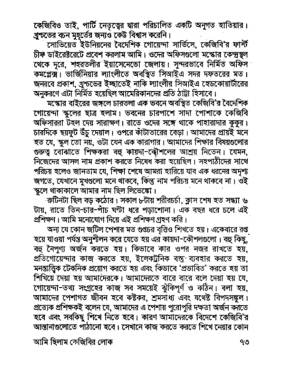

In [74]:
# Example filename

# Get the full path to the image file
image_path = "/kaggle/input/dlsprint2/badlad/images/test/" +test_sample_file_name

# Open the image using PIL
image = Image.open(image_path)
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


['b1051cbf-1f57-4391-9796-215aeda22bb3.png', 'd6490cce-3cd2-42e7-a7f7-3762833195c3.png', '968332d5-0cda-469c-b0d4-284702ee16db.png', '0df35ec6-e97b-4ba8-8853-ba6c69d8f493.png', 'd80efc54-d84d-4298-844c-cd7bbeba6045.png']


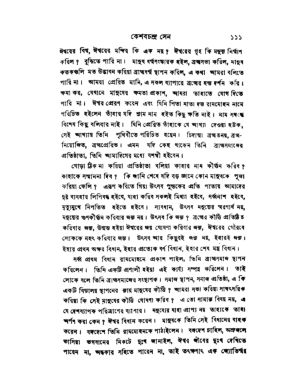

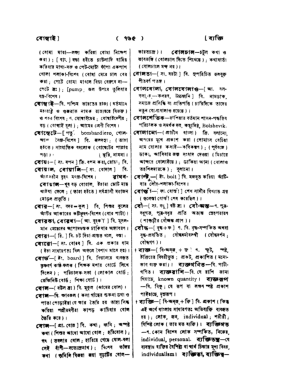

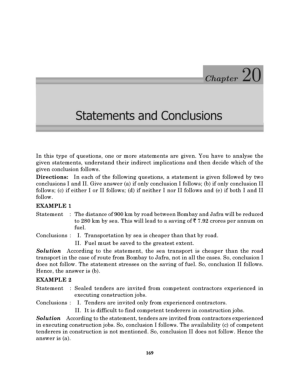

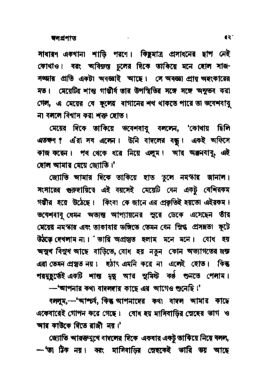

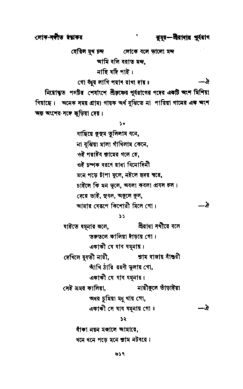

In [75]:
associated_file_names = []


for image_id in sim_ids:
    # Use loc to find the row with the matching image_id and extract the file_name
    file_name = candidate_subset1.loc[candidate_subset1['image_id'] == image_id, 'file_name'].values[0]
    associated_file_names.append(file_name)

# Print the associated file names
print(associated_file_names)

image_dir = "/kaggle/input/badlad-inference-pseudolabels/zipfile10"  # Replace with the actual path to your image directory

# Function to display images
def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Visualize each image
for file_name in associated_file_names:
    image_path = os.path.join(image_dir, file_name)
    display_image(image_path)

**use loop to generate query image and it's corresponding candidate similar image and download it in a fodler**

In [ ]:
import os
import shutil

# Define source and target folder paths
source_folder = "/kaggle/input/badlad-inference-pseudolabels/zipfile10/"
target_folder = "/kaggle/working/newdata1"

# Create the target folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# Loop to generate query labels and retrieve similar images for test_idx
for _ in range(200):  # Replace 2 with the number of times you want to repeat the process for test_idx
    # Generate random test_idx and get the test sample file name and image_id
    candidate_idx = np.random.choice(len(image_df))
    candidate_sample_file_name = image_df.iloc[candidate_idx]["file_name"]
    test_idx = np.random.choice(len(test_metadata))
    test_sample_file_name = test_metadata.iloc[test_idx]["file_name"]
    test_image_id = test_metadata.iloc[test_idx]["image_id"]

    sim_ids, file_name = fetch_similar(candidate_sample_file_name)

    print(f"Query label: {test_sample_file_name}")
    print(f"Top 5 candidate labels: {sim_ids}")

    associated_file_names = []

    for image_id in sim_ids:
        # Use loc to find the row with the matching image_id and extract the file_name
        file_name = candidate_subset1.loc[candidate_subset1['image_id'] == image_id, 'file_name'].values[0]
        associated_file_names.append(file_name)

    # Copy the matching images to the target folder
    for filename in os.listdir(source_folder):
        if filename in associated_file_names:
            source_path = os.path.join(source_folder, filename)
            target_path = os.path.join(target_folder, filename)
            shutil.copyfile(source_path, target_path)
    # Example filename
#     print("query image")
    # Get the full path to the image file
#     image_path = "/kaggle/input/dlsprint2/badlad/images/test/" +test_sample_file_name

#     # Open the image using PIL
#     image = Image.open(image_path)
#     # Display the image using matplotlib
#     plt.imshow(image)
#     plt.axis('off')  # Turn off axis labels
#     plt.show()
    
#     print("candidate images")

            
#     def display_image(image_path):
#         image = Image.open(image_path)
#         plt.imshow(image)
#         plt.axis('off')
#         plt.show()

#     # Visualize each image
#     for file_name in associated_file_names:
#         image_path = os.path.join(image_dir, file_name)
#         display_image(image_path)

print("*****finished*****")

**make a zip file of the folder**

In [ ]:
import zipfile
import os

# Path to the folder you want to zip
folder_path = "/kaggle/working/newdata1"

# Path and name of the zip file to create
zip_file_path = "/kaggle/working/newdata_unanno.zip"

# Create a zip file and write the contents of the folder to it
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Once the zip file is created, you can download it from the Kaggle output folder


**e paper**

In [26]:
import zipfile
import os

# Path to the folder you want to zip
folder_path = "/kaggle/working/selected_images"

# Path and name of the zip file to create
zip_file_path = "/kaggle/working/newdata_unanno.zip"

# Create a zip file and write the contents of the folder to it
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Once the zip file is created, you can download it from the Kaggle output folder

**check if the system is working properly**

In [53]:


# Filename to search for
filename_to_search = 'd6490cce-3cd2-42e7-a7f7-3762833195c3.png'

# Check if the filename exists in the DataFrame
if filename_to_search in test_metadata['file_name'].values:
    print(f"{filename_to_search} exists in the DataFrame.")
else:
    print(f"{filename_to_search} does not exist in the DataFrame.")


d6490cce-3cd2-42e7-a7f7-3762833195c3.png does not exist in the DataFrame.
